# Making snp density plots


In [1]:
print('Hello Plasmodium')

Hello Plasmodium


In [2]:
#import required modules for the plotting and calculations

import zarr
import allel
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/Users/am59/miniconda3/envs/amrwams/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#open zarr file format

data = zarr.open('/Volumes/Team112/ra4/pf_60_public_release/Pf_60_public_wg.final.zarr', mode = 'r' )
data

<zarr.hierarchy.Group '/' read-only>

In [4]:
#Explore the varriable in the variants tuple- not important if you already know these off 'head disk'

list(data['variants'])

['AC',
 'ALT',
 'AN',
 'CDS',
 'CHROM',
 'DP',
 'FILTER_Centromere',
 'FILTER_InternalHypervariable',
 'FILTER_Low_VQSLOD',
 'FILTER_PASS',
 'FILTER_SubtelomericHypervariable',
 'FILTER_SubtelomericRepeat',
 'ID',
 'POS',
 'QUAL',
 'REF',
 'RegionType',
 'SNPEFF_AMINO_ACID_CHANGE',
 'SNPEFF_CODON_CHANGE',
 'SNPEFF_EFFECT',
 'SNPEFF_EXON_ID',
 'SNPEFF_FUNCTIONAL_CLASS',
 'SNPEFF_GENE_NAME',
 'SNPEFF_IMPACT',
 'SNPEFF_TRANSCRIPT_ID',
 'VQSLOD',
 'is_snp',
 'numalt',
 'svlen']

In [5]:
#Generate a chunked table- saves on memory usage but not strictly necessary for the downstream exercise. Could directly work with 'data'. 

data_chunked = allel.VariantChunkedTable(data['variants'], names = ['CHROM', 'POS', 'FILTER_PASS', 'is_snp'])
data_chunked                                            

<VariantChunkedTable shape=(6051696,) dtype=[('CHROM', 'O'), ('POS', '<i4'), ('FILTER_PASS', '?'), ('is_snp', '?')]
   nbytes=80.8M cbytes=9.2M cratio=8.8
   values=zarr.hierarchy.Group>

In [6]:
#create an array for the snp locations on Chrom #'Pf3D7_01_v3'

pos = data_chunked['POS'][:][np.where(data_chunked['CHROM'] == 'Pf3D7_01_v3')]
pos

array([    30,     37,     58, ..., 640848, 640849, 640850], dtype=int32)

In [7]:
#Define a window for the bar plot

bins = 5000

In [8]:
#Generate a list of values, each having a width of 5000 spanning the entire selected chromosome

array = np.arange(0, pos.max(), bins)
array

array([     0,   5000,  10000,  15000,  20000,  25000,  30000,  35000,
        40000,  45000,  50000,  55000,  60000,  65000,  70000,  75000,
        80000,  85000,  90000,  95000, 100000, 105000, 110000, 115000,
       120000, 125000, 130000, 135000, 140000, 145000, 150000, 155000,
       160000, 165000, 170000, 175000, 180000, 185000, 190000, 195000,
       200000, 205000, 210000, 215000, 220000, 225000, 230000, 235000,
       240000, 245000, 250000, 255000, 260000, 265000, 270000, 275000,
       280000, 285000, 290000, 295000, 300000, 305000, 310000, 315000,
       320000, 325000, 330000, 335000, 340000, 345000, 350000, 355000,
       360000, 365000, 370000, 375000, 380000, 385000, 390000, 395000,
       400000, 405000, 410000, 415000, 420000, 425000, 430000, 435000,
       440000, 445000, 450000, 455000, 460000, 465000, 470000, 475000,
       480000, 485000, 490000, 495000, 500000, 505000, 510000, 515000,
       520000, 525000, 530000, 535000, 540000, 545000, 550000, 555000,
      

In [9]:
#Generate counts for each bin- note 'bin' is different from the defined variable 'bins'. 

hist, t = np.histogram(pos, bins=array)
hist

array([4341, 4678, 4666, 4813, 4492, 4540, 4549, 2905, 1954, 2888, 2898,
       2377, 3524, 1600,  638, 1339, 2360, 2568, 3226, 1391, 1067,  894,
        800,  866, 1109, 1012, 1054, 1250, 1169, 1170, 1119, 1126, 1193,
       1214, 1073, 1057, 1119, 1487, 1327, 1204,  986, 1148, 1033, 1039,
       1118,  912,  971, 1074, 1161, 1062,  990, 1124, 1109,  983, 1273,
       1097, 1321, 1080, 1109, 1049, 1184,  901, 1408, 1088, 1033, 1024,
        980, 1164, 1141, 1484, 1257, 1170, 1064,  743, 1062, 1059, 1034,
       1109, 1106, 1173, 1092, 1158, 1232, 1076, 1054, 1084,  794,  885,
        950,  798,  489,  380,  366,  310,  489,  793,  799,  997,  961,
       1095, 1184, 1329, 1215,  984, 1214, 1184, 1890, 1096, 1575, 1374,
       1444, 1161, 2529, 1833, 1308, 1327, 1256,  951, 2751, 3900, 2756,
       3255, 4665, 4223, 3535, 3587, 4692, 4747])

In [10]:
#generate y axis values- per nucleotide base over a 5000 window

y = hist/bins
y

array([0.8682, 0.9356, 0.9332, 0.9626, 0.8984, 0.908 , 0.9098, 0.581 ,
       0.3908, 0.5776, 0.5796, 0.4754, 0.7048, 0.32  , 0.1276, 0.2678,
       0.472 , 0.5136, 0.6452, 0.2782, 0.2134, 0.1788, 0.16  , 0.1732,
       0.2218, 0.2024, 0.2108, 0.25  , 0.2338, 0.234 , 0.2238, 0.2252,
       0.2386, 0.2428, 0.2146, 0.2114, 0.2238, 0.2974, 0.2654, 0.2408,
       0.1972, 0.2296, 0.2066, 0.2078, 0.2236, 0.1824, 0.1942, 0.2148,
       0.2322, 0.2124, 0.198 , 0.2248, 0.2218, 0.1966, 0.2546, 0.2194,
       0.2642, 0.216 , 0.2218, 0.2098, 0.2368, 0.1802, 0.2816, 0.2176,
       0.2066, 0.2048, 0.196 , 0.2328, 0.2282, 0.2968, 0.2514, 0.234 ,
       0.2128, 0.1486, 0.2124, 0.2118, 0.2068, 0.2218, 0.2212, 0.2346,
       0.2184, 0.2316, 0.2464, 0.2152, 0.2108, 0.2168, 0.1588, 0.177 ,
       0.19  , 0.1596, 0.0978, 0.076 , 0.0732, 0.062 , 0.0978, 0.1586,
       0.1598, 0.1994, 0.1922, 0.219 , 0.2368, 0.2658, 0.243 , 0.1968,
       0.2428, 0.2368, 0.378 , 0.2192, 0.315 , 0.2748, 0.2888, 0.2322,
      

In [11]:
#Generate x coordinates

x = (array[1:] + array[:-1])/2
x

array([  2500.,   7500.,  12500.,  17500.,  22500.,  27500.,  32500.,
        37500.,  42500.,  47500.,  52500.,  57500.,  62500.,  67500.,
        72500.,  77500.,  82500.,  87500.,  92500.,  97500., 102500.,
       107500., 112500., 117500., 122500., 127500., 132500., 137500.,
       142500., 147500., 152500., 157500., 162500., 167500., 172500.,
       177500., 182500., 187500., 192500., 197500., 202500., 207500.,
       212500., 217500., 222500., 227500., 232500., 237500., 242500.,
       247500., 252500., 257500., 262500., 267500., 272500., 277500.,
       282500., 287500., 292500., 297500., 302500., 307500., 312500.,
       317500., 322500., 327500., 332500., 337500., 342500., 347500.,
       352500., 357500., 362500., 367500., 372500., 377500., 382500.,
       387500., 392500., 397500., 402500., 407500., 412500., 417500.,
       422500., 427500., 432500., 437500., 442500., 447500., 452500.,
       457500., 462500., 467500., 472500., 477500., 482500., 487500.,
       492500., 4975

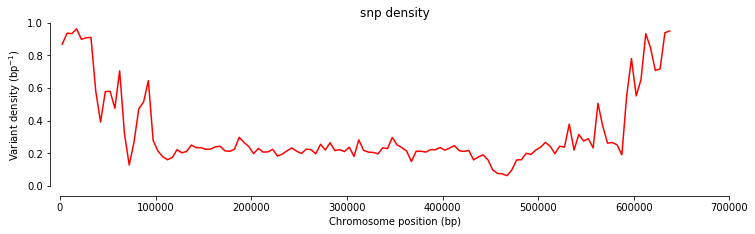

In [12]:
#Generate plot

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(x,y, 'r')
ax.set(title = 'snp density', ylabel = 'Variant density (bp$^{-1}$)', xlabel = 'Chromosome position (bp)', xlim= [0, 700000], ylim=[0, 1])
sns.despine(offset=10, ax=ax);
plt.show()


In [13]:
#Defining a function to make multiple plots based on certain conditions about the data

def snp_density_plot(pos, bins = 5000, figure = None, col = 'r'):
    #make the bins
    array = np.arange(0, pos.max(), bins)
    hist, t = np.histogram(pos, bins=array)
    y = hist/bins
    x = (array[1:] + array[:-1])/2
    
    #make a graph
    if figure:
        fig=figure[0]
        ax=figure[1]
    else:
        fig, ax = plt.subplots(figsize = (12,3)) 
        sns.despine(ax=ax, offset=10)
        
    ax.plot(x,y, col)
    ax.set(title = 'Raw variant density', ylabel = 'Variant density (bp$^{-1}$)', xlabel = 'Chromosome position (bp)', xlim= [0, 700000], ylim = [0,1])
    plt.show()
    
    return fig, ax

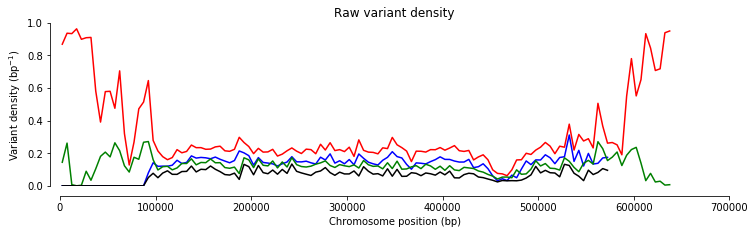

In [14]:
#to explicitly understand the graphing dynamics, you need to understand what 'fig' and 'ax' represent

npos = data_chunked['POS'][:][np.where((data_chunked['CHROM'] == 'Pf3D7_01_v3') & data_chunked['FILTER_PASS'])]
fig, ax = snp_density_plot(npos, bins = 5000, figure = [fig, ax], col = 'b')

npos = data_chunked['POS'][:][np.where((data_chunked['CHROM'] == 'Pf3D7_01_v3') & data_chunked['is_snp'])]
fig, ax = snp_density_plot(npos, bins = 5000, figure = [fig, ax], col = 'g')

npos = data_chunked['POS'][:][np.where((data_chunked['CHROM'] == 'Pf3D7_01_v3') & data_chunked['is_snp'] & data_chunked['FILTER_PASS'])]
fig, ax = snp_density_plot(npos, bins = 5000, figure = [fig, ax], col = 'k')


fig



###### End